Please enter the CSV dataset filename: houseprice_data
Please enter the all predictors variable column index values (e.g, 1, 3, 4 or 1): 1,3,5

Selected columns: ['bedrooms', 'sqft_living', 'floors']

   Column Name  Number of Outliers  Least Value Percentage Value
0     bedrooms                 546            0            2.53%
1  sqft_living                 572         4240            2.65%
2       floors                   8            4            0.04%


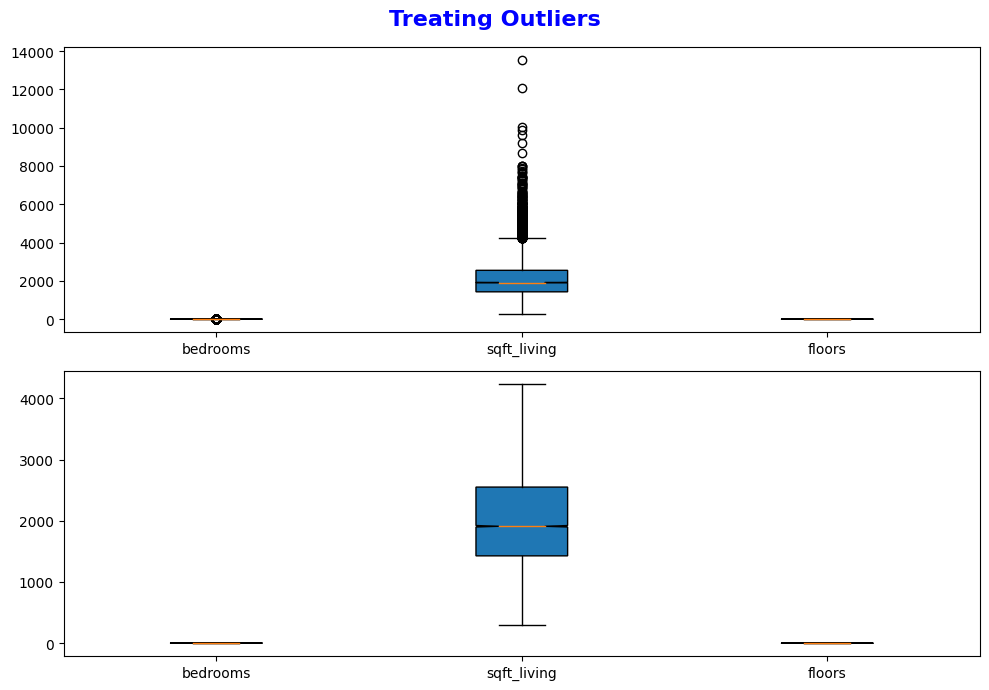

In [1]:
# Code written by Umolu John Chukwuemeka
# import libraries
import JUStat as js
import pandas as pd
import matplotlib.pyplot as plt

# create the new figure with width = 7 and height = 10
fig = plt.figure(figsize=(10, 7))
# set the figure title
fig.canvas.manager.set_window_title('Treating Selected Outliers By Umolu John Chukwuemeka')
# title by setting initial sizes
fig.suptitle('Treating Outliers', color='blue', fontsize=16, fontweight='bold')

# create an empty dataframe
df = pd.DataFrame()


def clean_outliers(df, predictor_variables):
    # create a subplot for the first figure
    axa = fig.add_subplot(211)
    # Creating axes instance
    bp = axa.boxplot(df[predictor_variables], patch_artist=True, notch='True', labels=predictor_variables)

    ############################
    # Treating Outliers Routine
    ############################
    # treating outliers
    table_dict, treated_outlier_data = js.treat_outliers(df, predictor_variables)

    treated_outlier_data.to_csv('Cleaned_Data.csv')
    ########################
    # Visualizing Box Plots
    ########################
    # create a new dataframe table
    outlier_table = pd.DataFrame(table_dict)
    # plot outliers table
    print(outlier_table)

    # create a subplot for the second figure
    axb = fig.add_subplot(212)
    # Creating axes instance
    bp2 = axb.boxplot(treated_outlier_data, patch_artist=True, notch='True', labels=predictor_variables)

    fig.tight_layout()
    # show plot
    plt.show()


def enter_columns(df):
    # enter the columns indexes
    column_indexes = str(input('Please enter the all predictors variable column index values (e.g, 1, 3, 4 or 1): '))

    # check if selected columns is separated with ',' and converted all the string values to integer
    col_values = list(map(lambda x: int(x), column_indexes.split(',')))\
        if ',' in column_indexes else [int(column_indexes)]

    # scan through all entered indexes to make sure it does not exceed the max value
    for index in col_values:
        if index > (len(df.columns) - 1):
            print(f'\nPlease use values less or equal to {len(df.columns) - 1}')

            # call the next function to enter column index values
            enter_columns(df)

    # selected columns to use
    predictor_variables = df.take(col_values, axis=1)

    # display selected columns
    print(f'\nSelected columns: {predictor_variables.columns.tolist()}\n')

    # call the next text input function
    clean_outliers(df, predictor_variables.columns)


def enter_filename():
    # make dataframe accessible from outside
    global df

    # enter the target columns name
    filename = input('Please enter the CSV dataset filename: ')

    try:
        # read CSV file to dataframe
        df = pd.read_csv(filename) if '.csv' in filename else pd.read_csv(f'{filename}.csv')

        # call the next function to enter column index values
        enter_columns(df)

    except BaseException as error:
        # display error message
        print('\nError: Please enter a valid CSV dataset filename: {}'.format(error))

        # call last text input function
        enter_filename()


# call the first text input function
enter_filename()